In [1]:
import os
import pandas as pd
import numpy as np
import re
import math

pd.set_option('display.max_columns', 100)

# будем отображать графики прямо в jupyter'e
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg'

import glob
from PIL import Image

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 9, 4

In [2]:
def FetAverageResults(label, path, index = -1):
    currentDir = os.getcwd();
    avg_result = None
    try:
        os.chdir(path)
        global_df = []
        for root, dirs, files in os.walk("."):
            if (root.endswith("Results")):
                for file in files:
                    if (file.startswith("Global.txt")):
                        global_df.append(pd.read_csv(root + "/" + file))
        avg_result = pd.concat(global_df, ignore_index=True)
        avg_result = avg_result.groupby('Year').mean()
    except OSError as err:
        print(os.getcwd(),'\n', err)
    else:
        os.chdir(currentDir)
        if (index < 0) | (index == len(avg)) :
            avg.append(avg_result)
            labels.append(label)
            experiments.append(path)
        else:
            avg[index] = avg_result
            labels[index] = label
            experiments[index] = path
        print('Sucess:', label, '\trows:', len(avg_result))
    finally:
        os.chdir(currentDir)


In [3]:
def RemoveConstantCols():
    for i in range(len(avg)):
        df = avg[i]
        cnt = 0;
        names = ''
        for column in df.columns:
            if (df[column][df.index[-1]] == df[column][df.index[1]]):
                names += column + ': ' + str(df[column][df.index[-1]]) + ';'
                cnt += 1
                del df[column]
        if cnt > 0:
            print(labels[i] + " removed cols:", cnt, '\n', names, '\n')

In [4]:
labels = []
experiments = []
avg = []
FetAverageResults('Sociabilit.Test', 'Logs\\Debug\\010.Sociabilit.Test.resX5.trsim', 0)


Sucess: Sociabilit.Test 	rows: 1120


In [5]:
RemoveConstantCols()

Sociabilit.Test removed cols: 41 
  Avg. genotype value (Ageing rate): 0.25; Avg. genotype value (Cooperation efficiency): 1.0; Avg. genotype value (Creativity): 0.0004; Avg. genotype value (F.r. determintaion efficiency): 0.0; Avg. genotype value (F.r. punishment likelyhood): 0.0; Avg. genotype value (Going hunting likelyhood): 1.0; Avg. genotype value (Hunting B efficiency): 0.0; Avg. genotype value (Hunting efficiency): 10.0; Avg. genotype value (Study efficiency): 1.0; Avg. genotype value (Study likelyhood): 1.0; Avg. genotype value (Teaching efficiency): 0.0; Avg. genotype value (Teaching likelyhood): 1.0; Avg. genotype value (Trick efficiency): 0.0; Avg. genotype value (Trick likelyhood): 1.0; Avg. genotype value (Useless actions likelihood): 0.0; Avg. phenotype value (Ageing rate): 0.25; Avg. phenotype value (Cooperation efficiency): 1.0; Avg. phenotype value (Creativity): 0.0004; Avg. phenotype value (F.r. determintaion efficiency): 0.0; Avg. phenotype value (F.r. punishment li

In [6]:
memoryFeature = ["Memory limit", "MemoryLimit", "ML"]
memoryAvg = ' Avg. phenotype value ({})'.format(memoryFeature[0])
features = [
    ["Trick likelyhood","Trick efficiency", "Teaching likelyhood", "Teaching efficiency", "Study likelyhood", "Study efficiency", "F.r. punishment likelyhood", "F.r. determintaion efficiency", "Going hunting likelyhood", "Hunting efficiency", "Hunting B efficiency", "Cooperation efficiency", "Creativity", "Useless actions likelihood", "Ageing rate", "Creativity", "Sociability","ForagingEfficiency"],
    ['TrickLikelyhood','TrickEfficiency','TeachingLikelyhood','TeachingEfficiency','StudyLikelyhood','StudyEfficiency','FreeRiderPunishmentLikelyhood','FreeRiderDeterminationEfficiency','LikelyhoodOfNotBeingAFreeRider','HuntingEfficiency','HuntingBEfficiency','CooperationEfficiency','Creativity','UselessActionsLikelihood','AgeingRate','Creativity','Sociability','ForagingEfficiency'],
    ["TrL","TrE","TeL","TeE","SL","SE","FRPL","FRDE","HL","HE","HBE","CE","Cre","Usl","AR","Cre","Soc","Frg"]]
def MemesEfficiency(index):
    return ' {} memes efficiency'.format(features[2][index])
def AvgPhenotype(index):
    return ' Avg. phenotype value ({})'.format(features[0][index])
def AvgMemesSize():
    for i in range(len(avg)):
        df = avg[i]
        for feature in range(len(features[0])):
            memoryPercent = ' % memory: {}'.format(features[1][feature])
            memesEfficiency = MemesEfficiency(feature)
            if ((AvgPhenotype(feature) in df.columns) & (memoryPercent in df.columns) & ~(memesEfficiency in df.columns)):
                df[memesEfficiency] = avg[i][AvgPhenotype(feature)]/(avg[i][memoryAvg]*avg[i][memoryPercent])
                print (memesEfficiency,experiments[i])
        if (' Avg. phenotype value (Memory limit)' in df.columns) & (' % memory: unused' in df.columns) & (' Average memes known' in df.columns):
            df[' Meme size'] = df[' Avg. phenotype value (Memory limit)']*(1-df[' % memory: unused'])/df[' Average memes known']
AvgMemesSize()

 TrE memes efficiency Logs\Debug\010.Sociabilit.Test.resX5.trsim
 HE memes efficiency Logs\Debug\010.Sociabilit.Test.resX5.trsim
 Usl memes efficiency Logs\Debug\010.Sociabilit.Test.resX5.trsim


In [7]:
AvgMemesSize()

In [21]:
pd.DataFrame([avg_df.iloc[avg_df.shape[0]-1] for avg_df in avg])

Average memes known   Average resources posessed  \
1119000                 23.951                       17.419   
1000000                 23.438                       15.052   
1000000                 24.374                       14.797   
61000                   23.253                       19.667   
10000000                23.317                       16.915   
9000000                 23.556                       17.201   
500000                  17.637                        6.760   

           Avg. genotype value (Memory limit)  \
1119000                                 2.596   
1000000                                 3.320   
1000000                                 2.867   
61000                                   8.455   
10000000                                3.748   
9000000                                 4.243   
500000                                  6.478   

           Avg. genotype value (Sociability)  \
1119000                               33.447   
1000000                               31.399   
1000000                               46.842   
61000                                    NaN   
10000000                              33.168   
9000000                               39.305   
500000                               121.365   

           Avg. phenotype value (Hunting efficiency)  \
1119000                                      229.532   
1000000                                      202.362   
1000000                                      157.868   
61000                                        138.975   
10000000                                     214.187   
9000000                                      191.328   
500000                                        39.620   

           Avg. phenotype value (Memory limit)  \
1119000                                  2.596   
1000000                                  3.320   
1000000                                  2.867   
61000                                    8.455   
10000000                                 3.748   
9000000                                  4.243   
500000                                   6.478   

           Avg. phenotype value (Sociability)  \
1119000                                33.447   
1000000                                31.399   
1000000                                46.842   
61000                                  30.000   
10000000                               33.168   
9000000                                39.305   
500000                                121.365   

           Avg. phenotype value (Trick efficiency)  \
1119000                                      1.690   
1000000                                     10.645   
1000000                                     14.582   
61000                                        8.620   
10000000                                     5.021   
9000000                                      7.011   
500000                                      23.327   

           Avg. phenotype value (Useless actions likelihood)   Population  \
1119000                                            0.002330        2317.0   
1000000                                            0.004450        2334.0   
1000000                                            0.003430        2367.0   
61000                                              0.004500         715.0   
10000000                                           0.000896         776.0   
9000000                                            0.000712         772.0   
500000                                             0.000041        1009.0   

           Tribes in the world.   Live memes   % memory: HuntingEfficiency  \
1119000                   138.0        199.0                        0.4020   
1000000                   141.0        161.0                        0.3220   
1000000                   101.0        191.0                        0.2830   
61000                      46.0        112.0                        0.4000   
10000000                   48.0        120.0 

In [9]:
def ShowGraph(dataframe, column, label):
    if (column in dataframe.columns):
        plt.plot(dataframe[column], label=label)
        plt.legend()
#ShowGraph(avg[0], ' Avg. phenotype value (Memory limit)', '{} Memory limit'.format(labels[i]))
#ShowGraph(avg[0], ' TrE memes efficiency', '{} TrE memes efficiency'.format(labels[i]))
#plt.show()

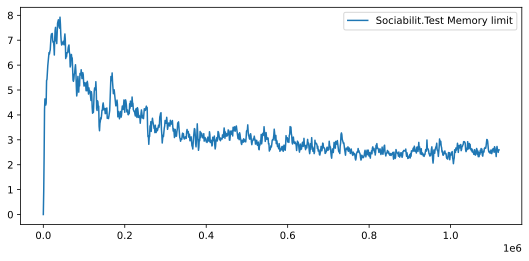

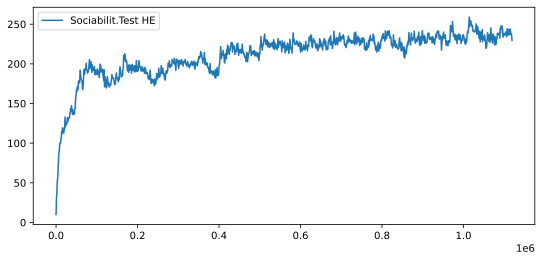

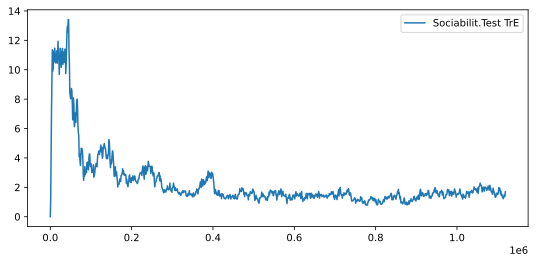

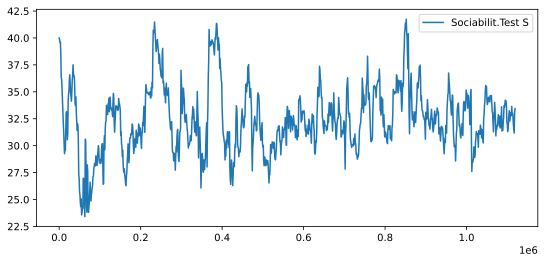

In [10]:
ShowGraph(avg[0], ' Avg. phenotype value (Memory limit)', label='{} Memory limit'.format(labels[0]))
plt.show()

#ShowGraph(avg[0], ' % memory: TrickEfficiency', label='{} % memory TrE'.format(labels[0]))
#ShowGraph(avg[0], ' % memory: HuntingEfficiency', label='{} % memory HE'.format(labels[0]))
#ShowGraph(avg[0], ' % memory: UselessActionsLikelihood', label='{} % memory Usl'.format(labels[0]))
#ShowGraph(avg[0], ' % memory: unused', label='{} % memory unused'.format(labels[0]))
#plt.show()

ShowGraph(avg[0], ' Avg. phenotype value (Hunting efficiency)', label='{} HE'.format(labels[0]))
plt.show()
ShowGraph(avg[0], ' Avg. phenotype value (Trick efficiency)', label='{} TrE'.format(labels[0]))
plt.show()
ShowGraph(avg[0], ' Avg. phenotype value (Sociability)', label='{} S'.format(labels[0]))
plt.show()


#ShowGraph(avg[0], ' TrE memes efficiency', label='{} TrEmemes efficiency'.format(labels[0]))
#plt.show()

#ShowGraph(avg[0], ' HE memes efficiency', label='{} HE memes efficiency'.format(labels[0]))
#plt.show()

#ShowGraph(avg[0], ' Usl memes efficiency', label='{} Usl memes efficiency'.format(labels[0]))
#plt.show()

#Sociability


In [11]:
FetAverageResults('Sociabilit.Genes.1', 'Logs\\Debug\\010.Sociabilit.Test.free.trsim\\20220130_111712', 1)
FetAverageResults('Sociabilit.Genes.2', 'Logs\\Debug\\010.Sociabilit.Test.free.trsim\\20220130_135142', 2)
RemoveConstantCols()


Sucess: Sociabilit.Genes.1 	rows: 1001
Sucess: Sociabilit.Genes.2 	rows: 1001
Sociabilit.Genes.1 removed cols: 40 
  Avg. genotype value (Ageing rate): 0.25; Avg. genotype value (Cooperation efficiency): 1.0; Avg. genotype value (Creativity): 0.0004; Avg. genotype value (F.r. determintaion efficiency): 0.0; Avg. genotype value (F.r. punishment likelyhood): 0.0; Avg. genotype value (Going hunting likelyhood): 1.0; Avg. genotype value (Hunting B efficiency): 0.0; Avg. genotype value (Hunting efficiency): 10.0; Avg. genotype value (Study efficiency): 1.0; Avg. genotype value (Study likelyhood): 1.0; Avg. genotype value (Teaching efficiency): 0.0; Avg. genotype value (Teaching likelyhood): 1.0; Avg. genotype value (Trick efficiency): 0.0; Avg. genotype value (Trick likelyhood): 1.0; Avg. genotype value (Useless actions likelihood): 0.0; Avg. phenotype value (Ageing rate): 0.25; Avg. phenotype value (Cooperation efficiency): 1.0; Avg. phenotype value (Creativity): 0.0004; Avg. phenotype val

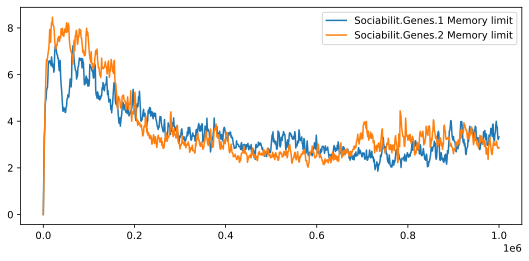

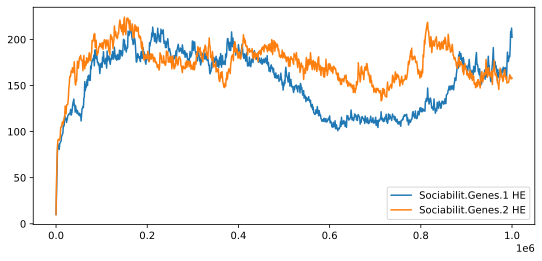

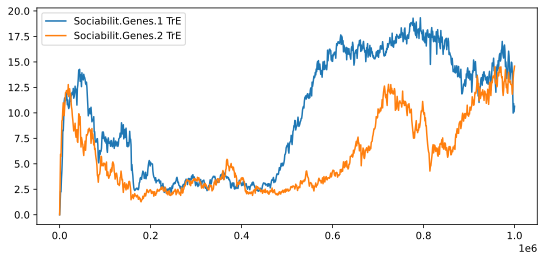

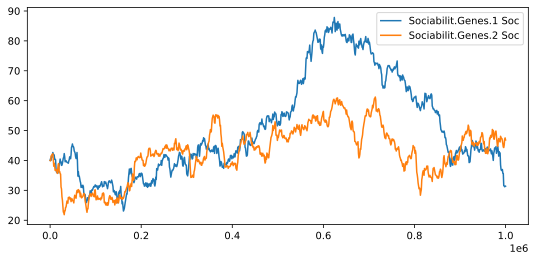

In [12]:
ShowGraph(avg[1], ' Avg. phenotype value (Memory limit)', label='{} Memory limit'.format(labels[1]))
ShowGraph(avg[2], ' Avg. phenotype value (Memory limit)', label='{} Memory limit'.format(labels[2]))
plt.gcf().savefig('Logs\\Debug\\010.Sociabilit.Test.free.trsim\\figure1.png')
plt.show()
ShowGraph(avg[1], ' Avg. phenotype value (Hunting efficiency)', label='{} HE'.format(labels[1]))
ShowGraph(avg[2], ' Avg. phenotype value (Hunting efficiency)', label='{} HE'.format(labels[2]))
plt.gcf().savefig('Logs\\Debug\\010.Sociabilit.Test.free.trsim\\figure2.png')
plt.show()
ShowGraph(avg[1], ' Avg. phenotype value (Trick efficiency)', label='{} TrE'.format(labels[1]))
ShowGraph(avg[2], ' Avg. phenotype value (Trick efficiency)', label='{} TrE'.format(labels[2]))
plt.gcf().savefig('Logs\\Debug\\010.Sociabilit.Test.free.trsim\\figure3.png')
plt.show()
ShowGraph(avg[1], ' Avg. phenotype value (Sociability)', label='{} Soc'.format(labels[1]))
ShowGraph(avg[2], ' Avg. phenotype value (Sociability)', label='{} Soc'.format(labels[2]))
plt.gcf().savefig('Logs\\Debug\\010.Sociabilit.Test.free.trsim\\figure4.png')
plt.show()

In [13]:
#010.Sociabilit.Test.Memes.trsim
FetAverageResults('Sociabilit.Test', 'Logs\\Debug\\010.Sociabilit.Test.Memes.trsim', 3)
RemoveConstantCols()
AvgMemesSize()

Sucess: Sociabilit.Test 	rows: 62
Sociabilit.Test removed cols: 42 
  Avg. genotype value (Ageing rate): 0.25; Avg. genotype value (Cooperation efficiency): 1.0; Avg. genotype value (Creativity): 0.0004; Avg. genotype value (F.r. determintaion efficiency): 0.0; Avg. genotype value (F.r. punishment likelyhood): 0.0; Avg. genotype value (Going hunting likelyhood): 1.0; Avg. genotype value (Hunting B efficiency): 0.0; Avg. genotype value (Hunting efficiency): 10.0; Avg. genotype value (Sociability): 30.0; Avg. genotype value (Study efficiency): 1.0; Avg. genotype value (Study likelyhood): 1.0; Avg. genotype value (Teaching efficiency): 0.0; Avg. genotype value (Teaching likelyhood): 1.0; Avg. genotype value (Trick efficiency): 0.0; Avg. genotype value (Trick likelyhood): 1.0; Avg. genotype value (Useless actions likelihood): 0.0; Avg. phenotype value (Ageing rate): 0.25; Avg. phenotype value (Cooperation efficiency): 1.0; Avg. phenotype value (Creativity): 0.0004; Avg. phenotype value (F.

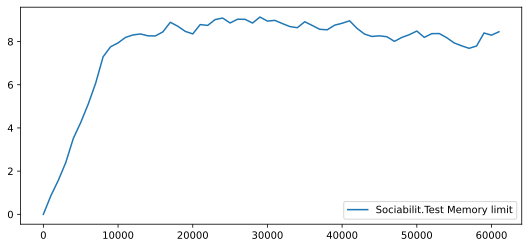

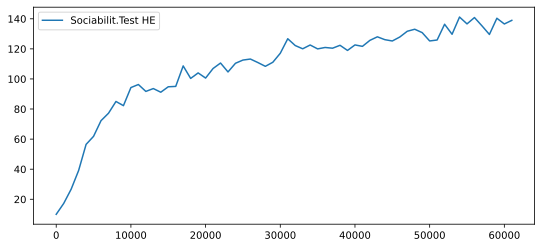

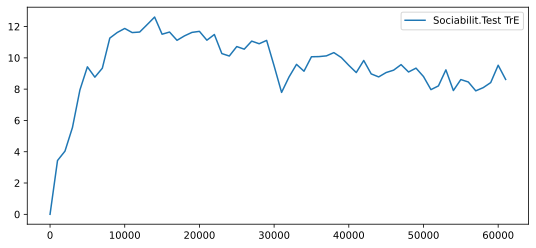

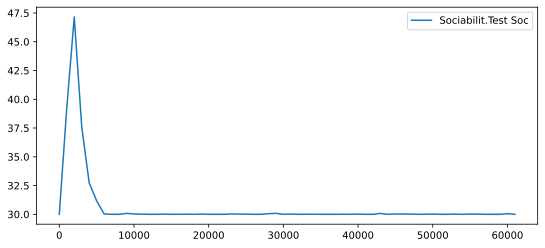

In [14]:
ShowGraph(avg[3], ' Avg. phenotype value (Memory limit)', label='{} Memory limit'.format(labels[3]))
#ShowGraph(avg[2], ' Avg. phenotype value (Memory limit)', label='{} Memory limit'.format(labels[2]))
plt.show()
ShowGraph(avg[3], ' Avg. phenotype value (Hunting efficiency)', label='{} HE'.format(labels[3]))
#ShowGraph(avg[2], ' Avg. phenotype value (Hunting efficiency)', label='{} HE'.format(labels[2]))
plt.show()
ShowGraph(avg[3], ' Avg. phenotype value (Trick efficiency)', label='{} TrE'.format(labels[3]))
#ShowGraph(avg[2], ' Avg. phenotype value (Trick efficiency)', label='{} TrE'.format(labels[2]))
plt.show()
ShowGraph(avg[3], ' Avg. phenotype value (Sociability)', label='{} Soc'.format(labels[3]))
#ShowGraph(avg[2], ' Avg. phenotype value (Sociability)', label='{} Soc'.format(labels[2]))
plt.show()

In [15]:
avg[1].head()
avg[1][avg[1].index == 600000]

Average memes known   Average resources posessed  \
Year                                                        
600000                24.344                       14.573   

         Avg. genotype value (Memory limit)  \
Year                                          
600000                                3.104   

         Avg. genotype value (Sociability)  \
Year                                         
600000                              77.823   

         Avg. phenotype value (Hunting efficiency)  \
Year                                                 
600000                                     116.999   

         Avg. phenotype value (Memory limit)  \
Year                                           
600000                                 3.104   

         Avg. phenotype value (Sociability)  \
Year                                          
600000                               77.823   

         Avg. phenotype value (Trick efficiency)  \
Year                                               
600000                                    15.057   

         Avg. phenotype value (Useless actions likelihood)   Population  \
Year                                                                      
600000                                            0.00231        2367.0   

         Tribes in the world.   Live memes   % memory: HuntingEfficiency  \
Year                                                                       
600000                     64        313.0                         0.187   

         % memory: TrickEfficiency   % memory: unused  \
Year                                                    
600000                         0.3              0.511   

         % memory: UselessActionsLikelihood   Average hunting efforts  \
Year                                                                    
600000                              0.00189                  3599.438   

         Child births   Deaths of old age   Meme Invented  \
Year                                                        
600000           94.0                93.0             2.0   

         Percentage of hunters   Total hunting efforts  \
Year                                                     
600000                    0.83                230364.1   

         % memory: unused when died   Longevity   Deaths of hunger  \
Year                                                                 
600000                         0.28      29.948                4.0   

         Child average brain size   TrE memes efficiency  \
Year                                                       
600000                     21.143              16.169459   

         HE memes efficiency   Usl memes efficiency   Meme size  
Year                                                             
600000            201.566721               0.393757     0.06235

In [107]:
#010.Sociabilit.Genes.Test.trsim.10m
FetAverageResults('Sociabilit.Test.10m', 'Logs\\Debug\\010.Sociabilit.Genes.Test.trsim.10m\\20220201_022533', 4)
FetAverageResults('Sociabilit.Test.9m', 'Logs\\Debug\\010.Sociabilit.Genes.Test.trsim.10m\\20220201_105334', 5)
FetAverageResults('Sociabilit.Test.9m', 'Logs\\Debug\\010.Sociabilit.Genes.Test.trsim.10m\\20220202_235410', 6)
RemoveConstantCols()
AvgMemesSize()
avg[4][-1:]

Sucess: Sociabilit.Test.10m 	rows: 10001
Sociabilit.Test.10m removed cols: 43 
  Avg. genotype value (Ageing rate): 0.25; Avg. genotype value (Cooperation efficiency): 1.0; Avg. genotype value (Creativity): 0.0004; Avg. genotype value (F.r. determintaion efficiency): 0.0; Avg. genotype value (F.r. punishment likelyhood): 0.0; Avg. genotype value (Going hunting likelyhood): 1.0; Avg. genotype value (Hunting B efficiency): 0.0; Avg. genotype value (Hunting efficiency): 10.0; Avg. genotype value (Study efficiency): 1.0; Avg. genotype value (Study likelyhood): 1.0; Avg. genotype value (Teaching efficiency): 0.0; Avg. genotype value (Teaching likelyhood): 1.0; Avg. genotype value (Trick efficiency): 0.0; Avg. genotype value (Trick likelyhood): 1.0; Avg. genotype value (Useless actions likelihood): 0.0; Avg. phenotype value (Ageing rate): 0.25; Avg. phenotype value (Cooperation efficiency): 1.0; Avg. phenotype value (Creativity): 0.0004; Avg. phenotype value (F.r. determintaion efficiency): 

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3263: DtypeWarning: Columns (42) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Average memes known   Average resources posessed  \
Year                                                          
10000000                23.317                       16.915   

           Avg. genotype value (ForagingEfficiency)  \
Year                                                  
10000000                                    120.155   

           Avg. genotype value (Memory limit)  \
Year                                            
10000000                                3.748   

           Avg. genotype value (Sociability)  \
Year                                           
10000000                              33.168   

           Avg. phenotype value (ForagingEfficiency)  \
Year                                                   
10000000                                     120.155   

           Avg. phenotype value (Hunting efficiency)  \
Year                                                   
10000000                                     214.187   

           Avg. phenotype value (Memory limit)  \
Year                                             
10000000                                 3.748   

           Avg. phenotype value (Sociability)  \
Year                                            
10000000                               33.168   

           Avg. phenotype value (Trick efficiency)  \
Year                                                 
10000000                                     5.021   

           Avg. phenotype value (Useless actions likelihood)   Live memes  \
Year                                                                        
10000000                                           0.000896         120.0   

           Population   Tribes in the world.   % memory: HuntingEfficiency  \
Year                                                                         
10000000        776.0                     48                         0.365   

           % memory: TrickEfficiency   % memory: unused  \
Year                                                      
10000000                       0.175              0.458   

           % memory: UselessActionsLikelihood   Average hunting efforts  \
Year                                                                      
10000000                              0.00104                  2949.537   

           Child average brain size   Deaths of old age   Meme Invented  \
Year                                                                      
10000000                     23.564                24.0             0.0   

           Percentage of hunters   Total hunting efforts  \
Year                                                       
10000000                   0.868                138628.3   

           % memory: unused when died   Longevity   TrE memes efficiency  \
Year                                                                       
10000000                        0.227      27.542                7.65513   

           HE memes efficiency   Usl memes efficiency   Meme size  
Year                                                               
10000000            156.567155               0.229866    0.087122

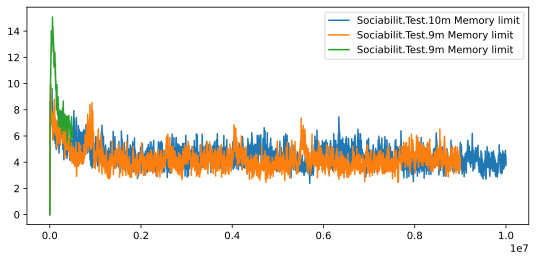

In [24]:
ShowGraph(avg[4], ' Avg. phenotype value (Memory limit)', label='{} Memory limit'.format(labels[4]))
ShowGraph(avg[5], ' Avg. phenotype value (Memory limit)', label='{} Memory limit'.format(labels[5]))
ShowGraph(avg[6], ' Avg. phenotype value (Memory limit)', label='{} Memory limit'.format(labels[6]))
plt.gcf().savefig('Logs\\Debug\\010.Sociabilit.Genes.Test.trsim.10m\\figure1_MemoryLimit.png')
plt.show()

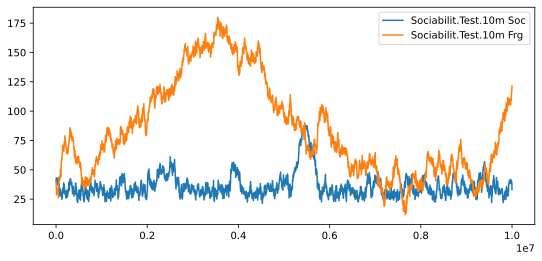

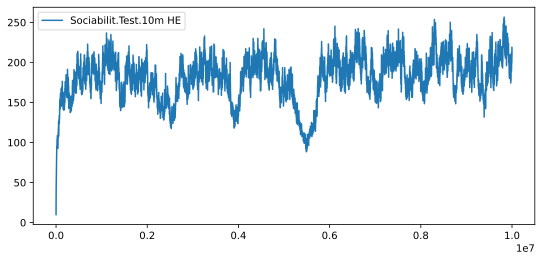

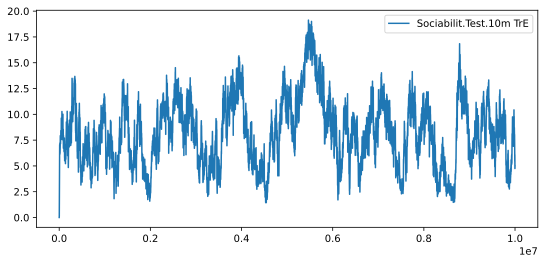

In [25]:
ShowGraph(avg[4], ' Avg. phenotype value (Sociability)', label='{} Soc'.format(labels[4]))
ShowGraph(avg[4], ' Avg. phenotype value (ForagingEfficiency)', label='{} Frg'.format(labels[4]))
plt.gcf().savefig('Logs\\Debug\\010.Sociabilit.Genes.Test.trsim.10m\\figure2_Soc+Frg.png')
plt.show()
ShowGraph(avg[4], ' Avg. phenotype value (Hunting efficiency)', label='{} HE'.format(labels[4]))
plt.gcf().savefig('Logs\\Debug\\010.Sociabilit.Genes.Test.trsim.10m\\figure3_HE.png')
plt.show()
ShowGraph(avg[4], ' Avg. phenotype value (Trick efficiency)', label='{} TrE'.format(labels[4]))
plt.gcf().savefig('Logs\\Debug\\010.Sociabilit.Genes.Test.trsim.10m\\figure4_TrE.png')

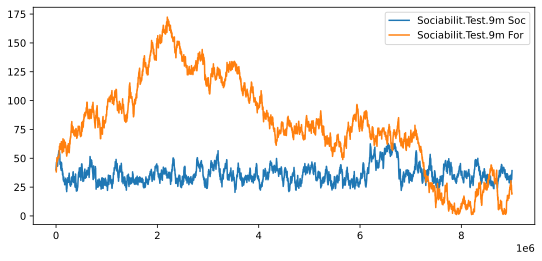

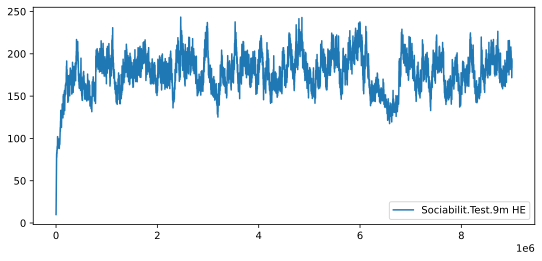

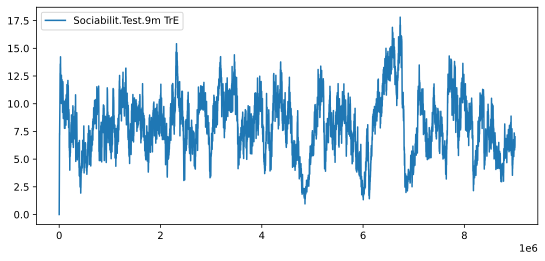

In [39]:
plt.show()
ShowGraph(avg[5], ' Avg. phenotype value (Sociability)', label='{} Soc'.format(labels[5]))
ShowGraph(avg[5], ' Avg. phenotype value (ForagingEfficiency)', label='{} For'.format(labels[5]))
plt.gcf().savefig('Logs\\Debug\\010.Sociabilit.Genes.Test.trsim.10m\\figure5_Soc+Frg.png')
plt.show()
ShowGraph(avg[5], ' Avg. phenotype value (Hunting efficiency)', label='{} HE'.format(labels[5]))
plt.gcf().savefig('Logs\\Debug\\010.Sociabilit.Genes.Test.trsim.10m\\figure6_HE.png')
plt.show()
ShowGraph(avg[5], ' Avg. phenotype value (Trick efficiency)', label='{} TrE'.format(labels[5]))
plt.gcf().savefig('Logs\\Debug\\010.Sociabilit.Genes.Test.trsim.10m\\figure7_TrE.png')
plt.show()

In [40]:
FetAverageResults('Foraging.Genes.Test', 'Logs\\Debug\\011.Foraging.Genes.Test.trsim\\20220201_225510', 7)
FetAverageResults('Foraging.Genes.Test', 'Logs\\Debug\\011.Foraging.Genes.Test.trsim\\20220203_110516', 8)
RemoveConstantCols()
AvgMemesSize()

Sucess: Foraging.Genes.Test 	rows: 501
Sucess: Foraging.Genes.Test 	rows: 4890
Foraging.Genes.Test removed cols: 42 
  Avg. genotype value (Ageing rate): 0.25; Avg. genotype value (Cooperation efficiency): 1.0; Avg. genotype value (Creativity): 0.0004; Avg. genotype value (F.r. determintaion efficiency): 0.0; Avg. genotype value (F.r. punishment likelyhood): 0.0; Avg. genotype value (Going hunting likelyhood): 1.0; Avg. genotype value (Hunting B efficiency): 0.0; Avg. genotype value (Hunting efficiency): 10.0; Avg. genotype value (Study efficiency): 1.0; Avg. genotype value (Study likelyhood): 1.0; Avg. genotype value (Teaching efficiency): 0.0; Avg. genotype value (Teaching likelyhood): 1.0; Avg. genotype value (Trick efficiency): 0.0; Avg. genotype value (Trick likelyhood): 1.0; Avg. genotype value (Useless actions likelihood): 0.0; Avg. phenotype value (Ageing rate): 0.25; Avg. phenotype value (Cooperation efficiency): 1.0; Avg. phenotype value (Creativity): 0.0004; Avg. phenotype v

In [44]:
avg[8][-1:].head()

Average memes known   Average resources posessed  \
Year                                                         
4889000                 18.23                        6.508   

          Avg. genotype value (Foraging Efficiency)  \
Year                                                  
4889000                                       2.794   

          Avg. genotype value (Memory limit)  \
Year                                           
4889000                                3.105   

          Avg. genotype value (Sociability)  \
Year                                          
4889000                             262.499   

          Avg. phenotype value (Foraging Efficiency)  \
Year                                                   
4889000                                        2.794   

          Avg. phenotype value (Hunting efficiency)  \
Year                                                  
4889000                                      31.212   

          Avg. phenotype value (Memory limit)  \
Year                                            
4889000                                 3.105   

          Avg. phenotype value (Sociability)  \
Year                                           
4889000                              262.499   

          Avg. phenotype value (Trick efficiency)   Population  \
Year                                                             
4889000                                    26.949       1143.0   

          Tribes in the world.   Live memes   % memory: HuntingEfficiency  \
Year                                                                        
4889000                      7        338.0                        0.0735   

          % memory: TrickEfficiency   % memory: unused  \
Year                                                     
4889000                       0.493              0.433   

          % memory: unused when died   Average hunting efforts  \
Year                                                             
4889000                        0.408                  3025.002   

          avg. memes relative effectiveness: HuntingEfficiency  \
Year                                                             
4889000                                            127.488       

          avg. memes relative effectiveness: TrickEfficiency  \
Year                                                           
4889000                                             19.733     

          avg. memes size: HuntingEfficiency  \
Year                                           
4889000                               0.0691   

          avg. memes size: TrickEfficiency   Child births   Deaths of hunger  \
Year                                                                           
4889000                             0.0987           54.0               21.0   

          Deaths of old age   Longevity   Percentage of hunters  \
Year                                                              
4889000                36.0      18.246                   0.586   

          Total hunting efforts   Child average brain size  \
Year                                                         
4889000                21175.02                      5.875   

          TrE memes efficiency   HE memes efficiency   Meme size  
Year                                                              
4889000              17.604923            136.764271    0.096574

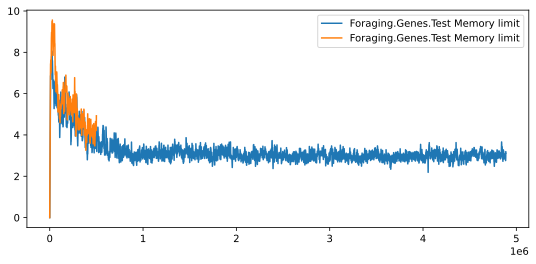

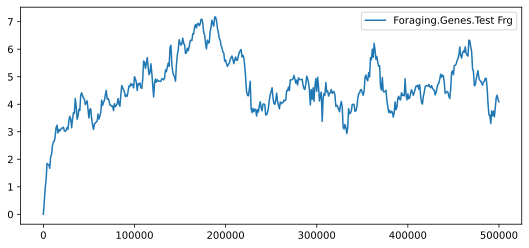

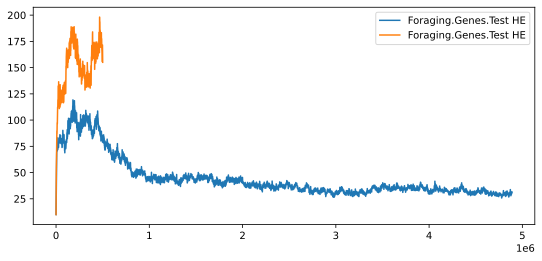

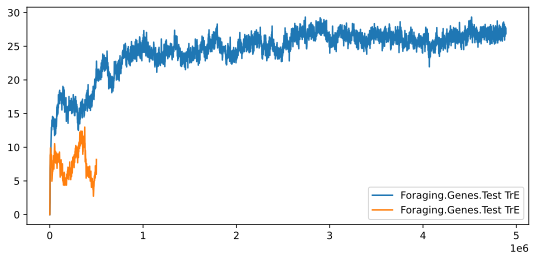

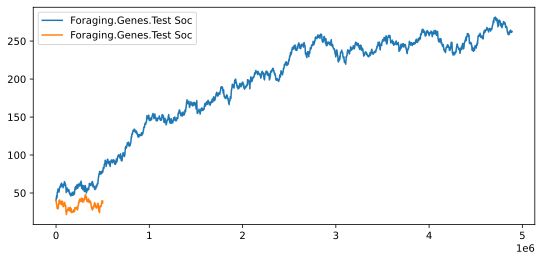

In [45]:
ShowGraph(avg[8], ' Avg. phenotype value (Memory limit)', label='{} Memory limit'.format(labels[8]))
ShowGraph(avg[7], ' Avg. phenotype value (Memory limit)', label='{} Memory limit'.format(labels[7]))
plt.show()
ShowGraph(avg[8], ' Avg. phenotype value (ForagingEfficiency)', label='{} Frg'.format(labels[8]))
ShowGraph(avg[7], ' Avg. phenotype value (ForagingEfficiency)', label='{} Frg'.format(labels[7]))
plt.show()
ShowGraph(avg[8], ' Avg. phenotype value (Hunting efficiency)', label='{} HE'.format(labels[8]))
ShowGraph(avg[7], ' Avg. phenotype value (Hunting efficiency)', label='{} HE'.format(labels[7]))
plt.show()
ShowGraph(avg[8], ' Avg. phenotype value (Trick efficiency)', label='{} TrE'.format(labels[8]))
ShowGraph(avg[7], ' Avg. phenotype value (Trick efficiency)', label='{} TrE'.format(labels[7]))
plt.show()
ShowGraph(avg[8], ' Avg. phenotype value (Sociability)', label='{} Soc'.format(labels[8]))
ShowGraph(avg[7], ' Avg. phenotype value (Sociability)', label='{} Soc'.format(labels[7]))
plt.show()

In [64]:
FetAverageResults('Foraging.Memes.Test', 'Logs\\Debug\\011.Foraging.Memes.Test.trsim', 6)
FetAverageResults('Foraging.Memes.Test', 'Logs\\Debug\\011.Foraging.Memes.Test.trsim\\20220202_051526', 7)
RemoveConstantCols()
AvgMemesSize()
avg[7][-5:].head()

Sucess: Foraging.Memes.Test 	rows: 501
Sucess: Foraging.Memes.Test 	rows: 11
Foraging.Memes.Test removed cols: 41 
  Avg. genotype value (Ageing rate): 0.25; Avg. genotype value (Cooperation efficiency): 1.0; Avg. genotype value (Creativity): 0.0004; Avg. genotype value (F.r. determintaion efficiency): 0.0; Avg. genotype value (F.r. punishment likelyhood): 0.0; Avg. genotype value (ForagingEfficiency): 0.0; Avg. genotype value (Going hunting likelyhood): 1.0; Avg. genotype value (Hunting B efficiency): 0.0; Avg. genotype value (Hunting efficiency): 10.0; Avg. genotype value (Study efficiency): 1.0; Avg. genotype value (Study likelyhood): 1.0; Avg. genotype value (Teaching efficiency): 0.0; Avg. genotype value (Teaching likelyhood): 1.0; Avg. genotype value (Trick efficiency): 0.0; Avg. genotype value (Trick likelyhood): 1.0; Avg. genotype value (Useless actions likelihood): 0.0; Avg. phenotype value (Ageing rate): 0.25; Avg. phenotype value (Cooperation efficiency): 1.0; Avg. phenotype

Average memes known   Average resources posessed  \
Year                                                       
6000                 18.079                       18.825   
7000                 18.038                       18.915   
8000                 18.880                       19.059   
9000                 19.728                       18.377   
10000                19.548                       19.161   

        Avg. genotype value (Memory limit)  \
Year                                         
6000                                 5.742   
7000                                 5.885   
8000                                 6.110   
9000                                 6.757   
10000                                6.627   

        Avg. genotype value (Sociability)  \
Year                                        
6000                               41.005   
7000                               42.662   
8000                               43.356   
9000                               42.977   
10000                              41.681   

        Avg. phenotype value (Foraging Efficiency)  \
Year                                                 
6000                                        2.4250   
7000                                        0.0151   
8000                                        0.0110   
9000                                        0.1310   
10000                                       0.0000   

        Avg. phenotype value (Hunting efficiency)  \
Year                                                
6000                                       63.788   
7000                                       67.088   
8000                                       68.954   
9000                                       69.391   
10000                                      71.916   

        Avg. phenotype value (Memory limit)  \
Year                                          
6000                                  5.742   
7000                                  5.885   
8000                                  6.110   
9000                                  6.757   
10000                                 6.627   

        Avg. phenotype value (Sociability)  \
Year                                         
6000                                41.005   
7000                                42.662   
8000                                43.356   
9000                                42.977   
10000                               41.681   

        Avg. phenotype value (Trick efficiency)  \
Year                                              
6000                                      2.478   
7000                                      2.500   
8000                                      4.372   
9000                                      6.596   
10000                                     7.434   

        Avg. phenotype value (Useless actions likelihood)   Population  \
Year                                                                     
6000                                               0.388         798.0   
7000                                               0.287         731.0   
8000                                               0.296         707.0   
9000                                               0.269         738.0   
10000                                              0.132         732.0   

        Tribes in the world.   Live memes   % memory: ForagingEfficiency  \
Year                                                                       
6000                      41         52.0                       0.002790   
7000                      33         58.0                       0.000005   
8000                      39         65.0                       0.000101   
9000                      38         71.0                       0.000176   
10000                     38         84.0                       0.000000   

        % memory: HuntingEfficiency   % memory: TrickEfficiency  \
Year                                                              


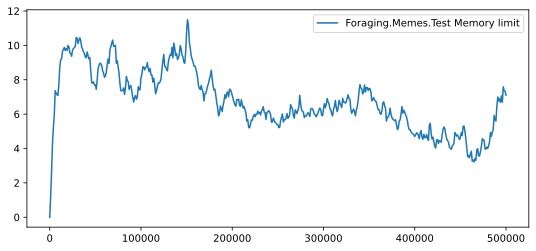

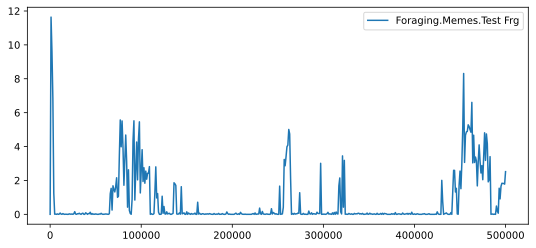

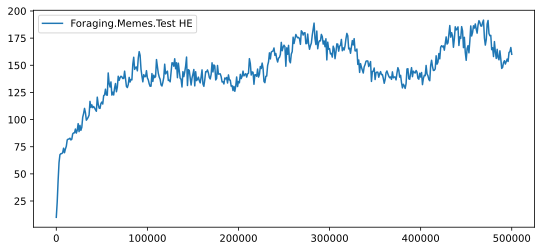

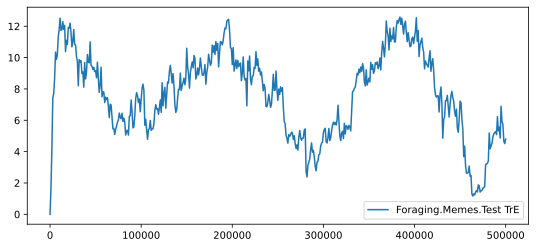

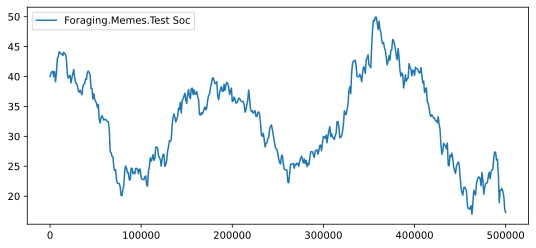

In [62]:
ShowGraph(avg[6], ' Avg. phenotype value (Memory limit)', label='{} Memory limit'.format(labels[6]))
plt.show()
ShowGraph(avg[6], ' Avg. phenotype value (ForagingEfficiency)', label='{} Frg'.format(labels[6]))
plt.show()
ShowGraph(avg[6], ' Avg. phenotype value (Hunting efficiency)', label='{} HE'.format(labels[6]))
plt.show()
ShowGraph(avg[6], ' Avg. phenotype value (Trick efficiency)', label='{} TrE'.format(labels[6]))
plt.show()
ShowGraph(avg[6], ' Avg. phenotype value (Sociability)', label='{} Soc'.format(labels[6]))
plt.show()

In [10]:
FetAverageResults('Original', 'Logs\\MemesGettingCheapest\\005.GenesAndMemesWithPedestal.trsim', 1)
FetAverageResults('RefactoringCheck.1', 'Logs\\Debug\\005.GenesAndMemesWithPedestal.trsim\\20220223_165314', 2)
FetAverageResults('RefactoringCheck.2', 'Logs\\Debug\\005.GenesAndMemesWithPedestal.trsim\\20220227_010356', 3)
RemoveConstantCols()
AvgMemesSize()

Sucess: Original 	rows: 7001
Sucess: RefactoringCheck.1 	rows: 1001
Sucess: RefactoringCheck.2 	rows: 2556
Original removed cols: 39 
  Avg. genotype value (Ageing rate): 0.25; Avg. genotype value (Cooperation efficiency): 1.0; Avg. genotype value (Creativity): 0.0004; Avg. genotype value (F.r. determintaion efficiency): 0.0; Avg. genotype value (F.r. punishment likelyhood): 0.0; Avg. genotype value (Going hunting likelyhood): 1.0; Avg. genotype value (Hunting B efficiency): 0.0; Avg. genotype value (Study efficiency): 1.0; Avg. genotype value (Study likelyhood): 1.0; Avg. genotype value (Teaching efficiency): 0.0; Avg. genotype value (Teaching likelyhood): 1.0; Avg. genotype value (Trick likelyhood): 1.0; Avg. phenotype value (Ageing rate): 0.25; Avg. phenotype value (Cooperation efficiency): 1.0; Avg. phenotype value (Creativity): 0.0004; Avg. phenotype value (F.r. determintaion efficiency): 0.0; Avg. phenotype value (F.r. punishment likelyhood): 0.0; Avg. phenotype value (Going hunt

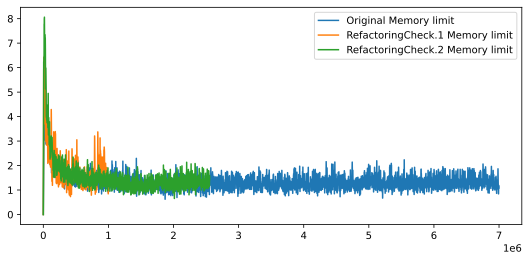

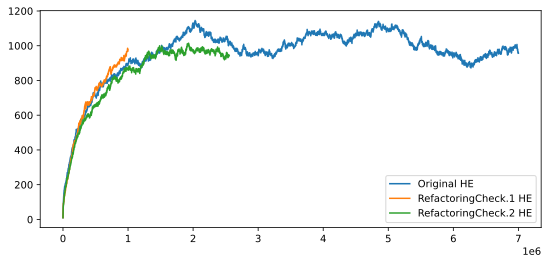

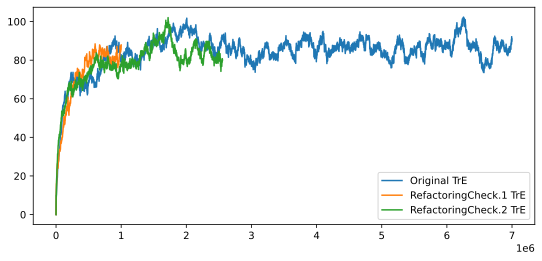

In [11]:
ShowGraph(avg[1], ' Avg. phenotype value (Memory limit)', label='{} Memory limit'.format(labels[1]))
ShowGraph(avg[2], ' Avg. phenotype value (Memory limit)', label='{} Memory limit'.format(labels[2]))
ShowGraph(avg[3], ' Avg. phenotype value (Memory limit)', label='{} Memory limit'.format(labels[3]))
plt.show()
ShowGraph(avg[1], ' Avg. phenotype value (Hunting efficiency)', label='{} HE'.format(labels[1]))
ShowGraph(avg[2], ' Avg. phenotype value (Hunting efficiency)', label='{} HE'.format(labels[2]))
ShowGraph(avg[3], ' Avg. phenotype value (Hunting efficiency)', label='{} HE'.format(labels[3]))
plt.show()
ShowGraph(avg[1], ' Avg. phenotype value (Trick efficiency)', label='{} TrE'.format(labels[1]))
ShowGraph(avg[2], ' Avg. phenotype value (Trick efficiency)', label='{} TrE'.format(labels[2]))
ShowGraph(avg[3], ' Avg. phenotype value (Trick efficiency)', label='{} TrE'.format(labels[3]))
plt.show()

In [71]:
#012.OrganizationAbility.Genes.trsim
#FetAverageResults('OrganizationAbility.1', 'Logs\\Debug\\012.OrganizationAbility.Genes.trsim\\20220628_022059', 9)
FetAverageResults('OrganizationAbility.2', 'Logs\\Debug\\012.OrganizationAbility.Genes.trsim\\20220628_112817', 10)
#FetAverageResults('OrganizationAbility.2', 'Logs\\Debug\\012.OrganizationAbility.Genes.trsim\\20220628_200127', 11)
RemoveConstantCols()
AvgMemesSize()
#avg[10].head()
#avg[10][-1:]
avg[10][avg[10].index == 4889000]


Sucess: OrganizationAbility.2 	rows: 10001
OrganizationAbility.2 removed cols: 75 
  Avg. genotype value (Ageing rate): 0.25; Avg. genotype value (Cooperation efficiency): 1.0; Avg. genotype value (Creativity): 0.0004; Avg. genotype value (F.r. determintaion efficiency): 0.0; Avg. genotype value (F.r. punishment likelyhood): 0.0; Avg. genotype value (Going hunting likelyhood): 1.0; Avg. genotype value (Hunting B efficiency): 0.0; Avg. genotype value (Hunting efficiency): 10.0; Avg. genotype value (Study efficiency): 1.0; Avg. genotype value (Study likelyhood): 1.0; Avg. genotype value (Teaching efficiency): 0.0; Avg. genotype value (Teaching likelyhood): 1.0; Avg. genotype value (Trick efficiency): 0.0; Avg. genotype value (Trick likelyhood): 1.0; Avg. genotype value (Useless actions likelihood): 0.0; Avg. phenotype value (Ageing rate): 0.25; Avg. phenotype value (Cooperation efficiency): 1.0; Avg. phenotype value (Creativity): 0.0004; Avg. phenotype value (F.r. determintaion efficienc

Average memes known   Average resources posessed  \
Year                                                         
4889000                20.945                       17.107   

          Avg. genotype value (Foraging Efficiency)  \
Year                                                  
4889000                                     107.471   

          Avg. genotype value (Memory limit)  \
Year                                           
4889000                                 4.52   

          Avg. genotype value (OrganizationAbility)  \
Year                                                  
4889000                                       0.194   

          Avg. genotype value (Sociability)  \
Year                                          
4889000                             311.031   

          Avg. phenotype value (Foraging Efficiency)  \
Year                                                   
4889000                                      107.471   

          Avg. phenotype value (Hunting efficiency)  \
Year                                                  
4889000                                      46.668   

          Avg. phenotype value (Memory limit)  \
Year                                            
4889000                                  4.52   

          Avg. phenotype value (OrganizationAbility)  \
Year                                                   
4889000                                        0.194   

          Avg. phenotype value (Sociability)  \
Year                                           
4889000                              311.031   

          Avg. phenotype value (Trick efficiency)  \
Year                                                
4889000                                    10.521   

          Avg. phenotype value (Useless actions likelihood)   Live memes  \
Year                                                                       
4889000                                               0.57         325.0   

          Population   Tribes in the world.   % memory: HuntingEfficiency  \
Year                                                                        
4889000        709.0                      4                         0.279   

          % memory: TrickEfficiency   % memory: unused  \
Year                                                     
4889000                       0.258              0.305   

          % memory: unused when died   % memory: UselessActionsLikelihood  \
Year                                                                        
4889000                        0.142                                0.157   

          Average hunting efforts  \
Year                                
4889000                  86544.19   

          avg. memes relative effectiveness: HuntingEfficiency  \
Year                                                             
4889000                                             35.039       

          avg. memes relative effectiveness: TrickEfficiency  \
Year                                                           
4889000                                             11.732     

          avg. memes relative effectiveness: UselessActionsLikelihood  \
Year                                                                    
4889000                                              1.881              

          avg. memes size: HuntingEfficiency  \
Year                                           
4889000                                0.168   

          avg. memes size: TrickEfficiency  \
Year                                         
4889000                              0.135   

          avg. memes size: UselessActionsLikelihood  \
Year                                                  
4889000                                       0.147   

          Child average brain size   Child births   Deaths of hunger  \
Year                                                                   
4889000                     24.598             27            

In [72]:
avg[8][-1:]

Average memes known   Average resources posessed  \
Year                                                         
4889000                 18.23                        6.508   

          Avg. genotype value (Foraging Efficiency)  \
Year                                                  
4889000                                       2.794   

          Avg. genotype value (Memory limit)  \
Year                                           
4889000                                3.105   

          Avg. genotype value (Sociability)  \
Year                                          
4889000                             262.499   

          Avg. phenotype value (Foraging Efficiency)  \
Year                                                   
4889000                                        2.794   

          Avg. phenotype value (Hunting efficiency)  \
Year                                                  
4889000                                      31.212   

          Avg. phenotype value (Memory limit)  \
Year                                            
4889000                                 3.105   

          Avg. phenotype value (Sociability)  \
Year                                           
4889000                              262.499   

          Avg. phenotype value (Trick efficiency)   Population  \
Year                                                             
4889000                                    26.949       1143.0   

          Tribes in the world.   Live memes   % memory: HuntingEfficiency  \
Year                                                                        
4889000                      7        338.0                        0.0735   

          % memory: TrickEfficiency   % memory: unused  \
Year                                                     
4889000                       0.493              0.433   

          % memory: unused when died   Average hunting efforts  \
Year                                                             
4889000                        0.408                  3025.002   

          avg. memes relative effectiveness: HuntingEfficiency  \
Year                                                             
4889000                                            127.488       

          avg. memes relative effectiveness: TrickEfficiency  \
Year                                                           
4889000                                             19.733     

          avg. memes size: HuntingEfficiency  \
Year                                           
4889000                               0.0691   

          avg. memes size: TrickEfficiency   Child births   Deaths of hunger  \
Year                                                                           
4889000                             0.0987           54.0               21.0   

          Deaths of old age   Longevity   Percentage of hunters  \
Year                                                              
4889000                36.0      18.246                   0.586   

          Total hunting efforts   Child average brain size  \
Year                                                         
4889000                21175.02                      5.875   

          TrE memes efficiency   HE memes efficiency   Meme size  
Year                                                              
4889000              17.604923            136.764271    0.096574

OrganizationAbility получено из 011.Foraging.Genes всё кроме изучаемого параметра не отличается.

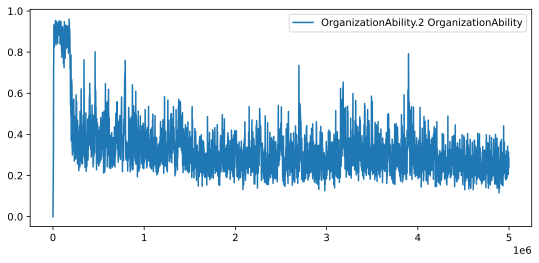

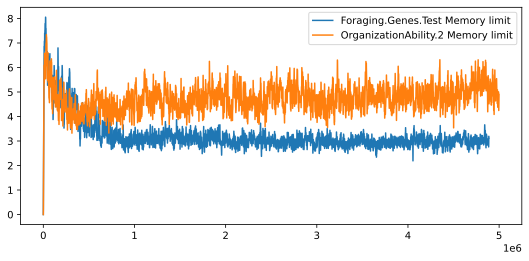

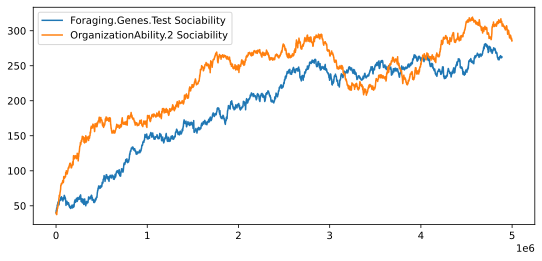

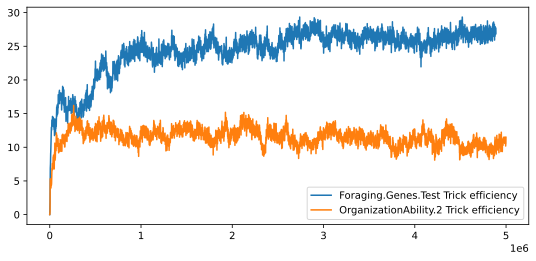

In [81]:
ShowGraph(avg[10][:5000], ' Avg. phenotype value (OrganizationAbility)', label='{} OrganizationAbility'.format(labels[10]))
plt.show()
#ShowGraph(avg[10], ' Avg. phenotype value (OrganizationAbility)', label='{} OrganizationAbility'.format(labels[10]))
#plt.show()
ShowGraph(avg[8][:5000], ' Avg. phenotype value (Memory limit)', label='{} Memory limit'.format(labels[8]))
ShowGraph(avg[10][:5000], ' Avg. phenotype value (Memory limit)', label='{} Memory limit'.format(labels[10]))
plt.show()
ShowGraph(avg[8][:5000], ' Avg. phenotype value (Sociability)', label='{} Sociability'.format(labels[8]))
ShowGraph(avg[10][:5000], ' Avg. phenotype value (Sociability)', label='{} Sociability'.format(labels[10]))
plt.show()
ShowGraph(avg[8][:5000], ' Avg. phenotype value (Trick efficiency)', label='{} Trick efficiency'.format(labels[8]))
ShowGraph(avg[10][:5000], ' Avg. phenotype value (Trick efficiency)', label='{} Trick efficiency'.format(labels[10]))


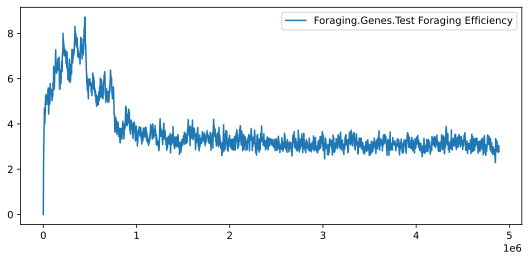

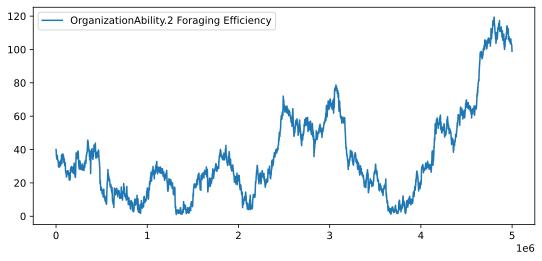

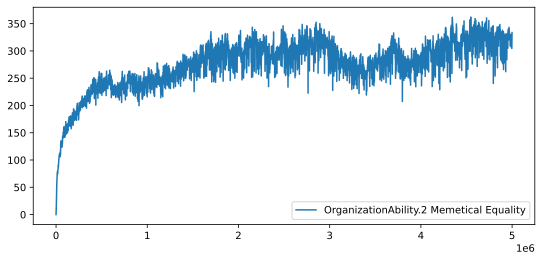

In [86]:
ShowGraph(avg[8][:5000], ' Avg. phenotype value (Foraging Efficiency)', label='{} Foraging Efficiency'.format(labels[8]))
plt.show()
ShowGraph(avg[10][:5000], ' Avg. phenotype value (Foraging Efficiency)', label='{} Foraging Efficiency'.format(labels[10]))
plt.show()
ShowGraph(avg[10][:5000], ' Avg. phenotype value (Total mems types)', label='{} Total mems types'.format(labels[10]))
plt.show()
ShowGraph(avg[10][:5000], ' Memetical Equality', label='{} Memetical Equality'.format(labels[10]))
plt.show()

In [88]:
#012.OrganizationAbility+Social.Genes.Test.trsim\\20220629_035615
FetAverageResults('OrganizationAbility+Social.1', 'Logs\\Debug\\012.OrganizationAbility+Social.Genes.Test.trsim\\20220629_035615', 11)
RemoveConstantCols()
AvgMemesSize()
avg[11][avg[11].index == 5000000]
#Memetical Equality

Sucess: OrganizationAbility+Social.1 	rows: 6307
OrganizationAbility+Social.1 removed cols: 76 
  Avg. genotype value (Ageing rate): 0.25; Avg. genotype value (Cooperation efficiency): 1.0; Avg. genotype value (Creativity): 0.0004; Avg. genotype value (F.r. determintaion efficiency): 0.0; Avg. genotype value (F.r. punishment likelyhood): 0.0; Avg. genotype value (Foraging Efficiency): 40.0; Avg. genotype value (Going hunting likelyhood): 1.0; Avg. genotype value (Hunting B efficiency): 0.0; Avg. genotype value (Hunting efficiency): 10.0; Avg. genotype value (Study efficiency): 1.0; Avg. genotype value (Study likelyhood): 1.0; Avg. genotype value (Teaching efficiency): 0.0; Avg. genotype value (Teaching likelyhood): 1.0; Avg. genotype value (Trick efficiency): 0.0; Avg. genotype value (Trick likelyhood): 1.0; Avg. genotype value (Useless actions likelihood): 0.0; Avg. phenotype value (Ageing rate): 0.25; Avg. phenotype value (Cooperation efficiency): 1.0; Avg. phenotype value (Creativit

Average memes known   Average resources posessed  \
Year                                                         
5000000                20.818                       18.124   

          Avg. genotype value (Memory limit)  \
Year                                           
5000000                                5.086   

          Avg. genotype value (OrganizationAbility)  \
Year                                                  
5000000                                       0.251   

          Avg. genotype value (Sociability)  \
Year                                          
5000000                             282.298   

          Avg. phenotype value (Hunting efficiency)  \
Year                                                  
5000000                                      43.047   

          Avg. phenotype value (Memory limit)  \
Year                                            
5000000                                 5.086   

          Avg. phenotype value (OrganizationAbility)  \
Year                                                   
5000000                                        0.251   

          Avg. phenotype value (Sociability)  \
Year                                           
5000000                              282.298   

          Avg. phenotype value (Trick efficiency)  \
Year                                                
5000000                                    12.627   

          Avg. phenotype value (Useless actions likelihood)   Live memes  \
Year                                                                       
5000000                                               0.55         333.0   

          Population   Tribes in the world.   % memory: HuntingEfficiency  \
Year                                                                        
5000000        687.0                      4                         0.223   

          % memory: TrickEfficiency   % memory: unused  \
Year                                                     
5000000                       0.318              0.337   

          % memory: unused when died   % memory: UselessActionsLikelihood  \
Year                                                                        
5000000                        0.102                                0.123   

          Average hunting efforts  \
Year                                
5000000                  79956.58   

          avg. memes relative effectiveness: HuntingEfficiency  \
Year                                                             
5000000                                              39.73       

          avg. memes relative effectiveness: TrickEfficiency  \
Year                                                           
5000000                                             10.042     

          avg. memes relative effectiveness: UselessActionsLikelihood  \
Year                                                                    
5000000                                              2.431              

          avg. memes size: HuntingEfficiency  \
Year                                           
5000000                                0.159   

          avg. memes size: TrickEfficiency  \
Year                                         
5000000                              0.169   

          avg. memes size: UselessActionsLikelihood  \
Year                                                  
5000000                                       0.148   

          Child average brain size   Child births   Deaths of hunger  \
Year                                                                   
5000000                     25.113           25.0                3.0   

          Deaths of old age   Longevity   Meme Invented   Memetical Equality  \
Year                                                                           
5000000                25.0        28.0             0.0                0.367   

          Percentage of hunters   Total hunting efforts   Total memes types  \
Yea

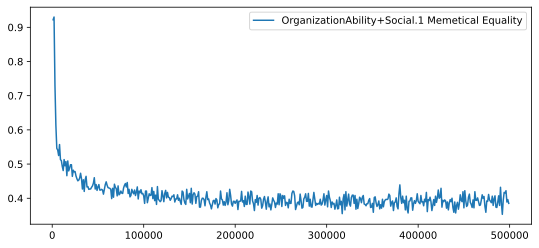

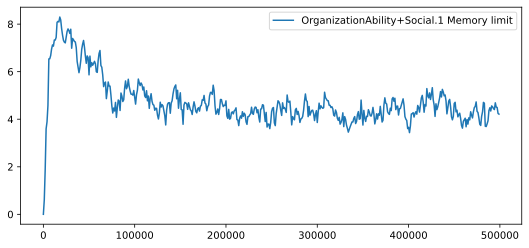

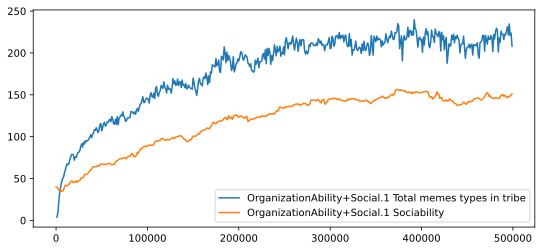

In [118]:
ShowGraph(avg[11][:500], ' Memetical Equality', label='{} Memetical Equality'.format(labels[11]))
plt.show()
ShowGraph(avg[11][:500], ' Avg. phenotype value (Memory limit)', label='{} Memory limit'.format(labels[11]))
plt.show()
ShowGraph(avg[11][:500], ' Total memes types', label='{} Total memes types in tribe'.format(labels[11]))
ShowGraph(avg[11][:500], ' Avg. phenotype value (Sociability)', label='{} Sociability'.format(labels[11]))
plt.show()

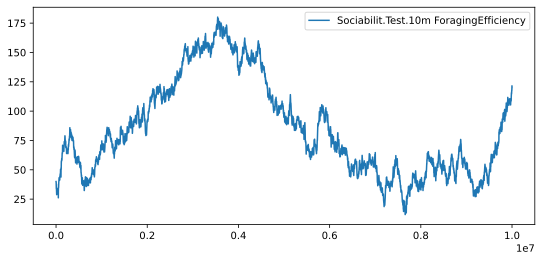

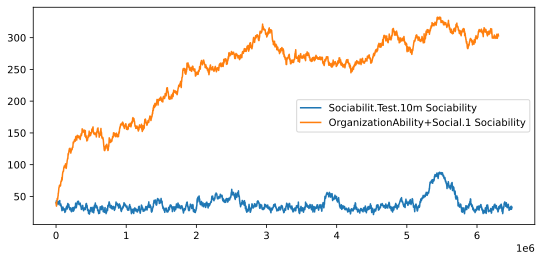

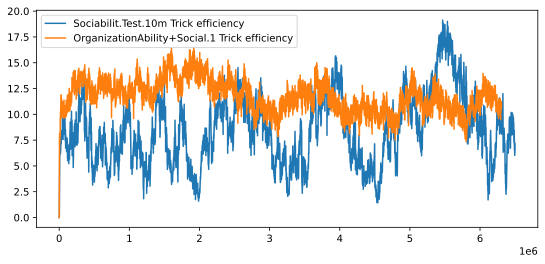

Average memes known   Average resources posessed  \
Year                                                         
6500000                23.388                       17.368   

          Avg. genotype value (ForagingEfficiency)  \
Year                                                 
6500000                                     49.949   

          Avg. genotype value (Memory limit)  \
Year                                           
6500000                                5.422   

          Avg. genotype value (Sociability)  \
Year                                          
6500000                              32.392   

          Avg. phenotype value (ForagingEfficiency)  \
Year                                                  
6500000                                      49.949   

          Avg. phenotype value (Hunting efficiency)  \
Year                                                  
6500000                                     197.008   

          Avg. phenotype value (Memory limit)  \
Year                                            
6500000                                 5.422   

          Avg. phenotype value (Sociability)  \
Year                                           
6500000                               32.392   

          Avg. phenotype value (Trick efficiency)  \
Year                                                
6500000                                     7.309   

          Avg. phenotype value (Useless actions likelihood)   Live memes  \
Year                                                                       
6500000                                            0.00676         109.0   

          Population   Tribes in the world.   % memory: HuntingEfficiency  \
Year                                                                        
6500000        744.0                     45                         0.365   

          % memory: TrickEfficiency   % memory: unused  \
Year                                                     
6500000                         0.2              0.428   

          % memory: UselessActionsLikelihood   Average hunting efforts  \
Year                                                                     
6500000                              0.00618                   2880.26   

          Child average brain size   Deaths of old age   Meme Invented  \
Year                                                                     
6500000                     25.642                33.0             0.0   

          Percentage of hunters   Total hunting efforts  \
Year                                                      
6500000                    0.87                129611.7   

          % memory: unused when died   Longevity   TrE memes efficiency  \
Year                                                                      
6500000                        0.264      24.553               6.740133   

          HE memes efficiency   Usl memes efficiency   Meme size  
Year                                                              
6500000             99.547758               0.201743    0.132606

In [114]:
plt.show()
ShowGraph(avg[4][:6500], ' Avg. phenotype value (Sociability)', label='{} Sociability'.format(labels[4]))
ShowGraph(avg[11], ' Avg. phenotype value (Sociability)', label='{} Sociability'.format(labels[11]))
plt.show()
ShowGraph(avg[4][:6500], ' Avg. phenotype value (Trick efficiency)', label='{} Trick efficiency'.format(labels[4]))
ShowGraph(avg[11], ' Avg. phenotype value (Trick efficiency)', label='{} Trick efficiency'.format(labels[11]))
plt.show()
avg[4][avg[4].index == 6500000]